# Title

Exploratory-Analysis-of-Ebay-Car-Sales-Data

# Project Description

For this project, we will be doing an exploratory data analysis on a dataset that concerns used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

# Importation

In [5]:
# Importing relevant libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [109]:
autos = pd.read_csv("auto.csv", encoding = "Latin-1")

# Exploratory Data Analysis: EDA

## Dataset overview

In [110]:
autos.shape

(50000, 20)

In [111]:
# First and last few rows
autos.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54


In [112]:
autos.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [113]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

# Hypothesis

# Null Hypothesis, HO

Car sales occur most at a certain months of the year

# AlternativeHypothesis, H1

Car sales are spread equally throughout the year

# Questions

1. How does the price of each vehicleType change over time?
2. what correlates the most with price?
3. what are the most expensive brands.
4. what brands are sold the fastest?
5. what vehicleType is the most common?

# Issues with the data and how I intend to solve them

| No | Issue | Solution |
| --- | --- | --- |
| 1. | column names are in camelcase instead of snakecase | change column names |
| 2. | seller, abtest, unrepaired damage, gearbox and offer type columns have only two unique values | we drop them |
| 3. | price & odometer column are formatted as string instead of float | change dataType |
| 4. | nr_pictures column has only null values | we drop it |

# Data Cleaning

## columns

In [114]:
# Check column names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [115]:
# Changing column names to snakecase
autos.columns = ["date_crawled", "name", "seller", "offer_type", "price",
"ab_test", "vehicle_type", "registration_year", "gearbox", 
"power_ps", "model", "kilometer", "registration_month", 
"fuel_type", "brand", "unrepaired_damage", "date_created", 
"nr_pictures", "postal_code", "last_seen"]

# Check new column names
autos

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,nr_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [116]:
#deleting columns with only 2 unique values
autos=autos.drop(['seller', 'unrepaired_damage', 'gearbox', 'offer_type', 'ab_test', 'nr_pictures'], axis=1)

In [117]:
#checking the price column and kilometer column
autos.price, autos.kilometer

(0         $5,000
 1         $8,500
 2         $8,990
 3         $4,350
 4         $1,350
           ...   
 49995    $24,900
 49996     $1,980
 49997    $13,200
 49998    $22,900
 49999     $1,250
 Name: price, Length: 50000, dtype: object,
 0        150,000km
 1        150,000km
 2         70,000km
 3         70,000km
 4        150,000km
            ...    
 49995    100,000km
 49996    150,000km
 49997      5,000km
 49998     40,000km
 49999    150,000km
 Name: kilometer, Length: 50000, dtype: object)

In [118]:
#changing the price & kilometer column to float
autos['price'] = autos['price'].apply(
    lambda x: float(str(x).replace('$','').replace(',','')) if '$' in x
else x)
autos['kilometer'] = autos['kilometer'].apply(
    lambda x: float(str(x).replace('km','').replace(',','')) if 'km' in x
else x)

#checking the price & kilometer column
autos.price, autos.kilometer

(0         5000.0
 1         8500.0
 2         8990.0
 3         4350.0
 4         1350.0
           ...   
 49995    24900.0
 49996     1980.0
 49997    13200.0
 49998    22900.0
 49999     1250.0
 Name: price, Length: 50000, dtype: float64,
 0        150000.0
 1        150000.0
 2         70000.0
 3         70000.0
 4        150000.0
            ...   
 49995    100000.0
 49996    150000.0
 49997      5000.0
 49998     40000.0
 49999    150000.0
 Name: kilometer, Length: 50000, dtype: float64)

In [119]:
autos.describe(include='all')

,date_crawled,name,price,vehicle_type,registration_year,power_ps,model,kilometer,registration_month,fuel_type,brand,date_created,postal_code,last_seen
count,50000,50000,5.000000e+04,44905,50000.000000,50000.000000,47242,50000.000000,50000.000000,45518,50000,50000,50000.000000,50000
unique,48213,38754,NaN,8,NaN,NaN,245,NaN,NaN,7,40,76,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,NaN,limousine,NaN,NaN,golf,NaN,NaN,benzin,volkswagen,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,NaN,12859,NaN,NaN,4024,NaN,NaN,30107,10687,1946,NaN,8
mean,NaN,NaN,9.840044e+03,NaN,2005.073280,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,4.811044e+05,NaN,105.712813,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,0.000000e+00,NaN,1000.000000,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1.100000e+03,NaN,1999.000000,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,2.950000e+03,NaN,2003.000000,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,7.200000e+03,NaN,2008.000000,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,71540.000000,NaN


## outliers

In [120]:
#number of unique values of price
autos.price.unique().shape

(2357,)

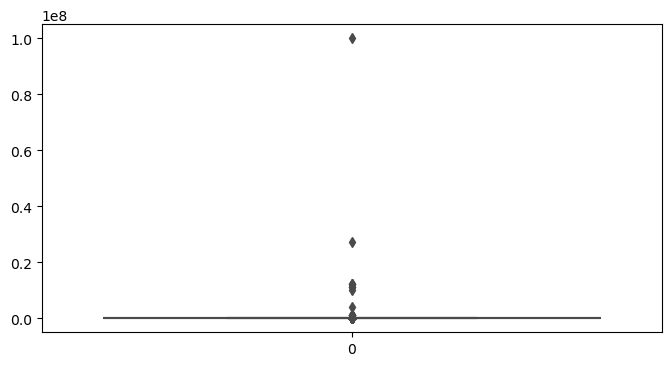

In [121]:
# checking for outliers in the price column
plt.figure(figsize=(8,4))
sns.boxplot(data=autos.price,palette='Blues_d')
plt.show()

In [122]:
print(autos.price.value_counts().sort_index(ascending=False).head(25))

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
194000.0      1
190000.0      1
180000.0      1
175000.0      1
169999.0      1
Name: price, dtype: int64


In [123]:
print(autos.price.value_counts().sort_index(ascending=True).head(25))

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
40.0       6
45.0       4
47.0       1
49.0       4
50.0      49
Name: price, dtype: int64


In [124]:
#the zeros were probably bidding prices, so we start from one as a starting bidding price
#we end at 350,000 since thats where the prices become too high

#keeping only prices btw 1 and 350,000
autos = autos[autos['price'].between(1, 350000)]
autos.describe()

#the registration year has max value of 9999 which is an impossible year, so we'll check that further

,price,registration_year,power_ps,kilometer,registration_month,postal_code
count,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000
mean,5888.935591,2004.755421,117.197158,125770.101925,5.782251,50975.745207
std,9059.854754,88.643887,200.649618,39788.636804,3.685595,25746.968398
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


In [125]:
#checking frequency of each registration_year
autos['registration_year'].value_counts().sort_index(ascending=False).head(25)

9999       3
9000       1
8888       1
6200       1
5911       1
5000       4
4800       1
4500       1
4100       1
2800       1
2019       2
2018     470
2017    1392
2016    1220
2015     392
2014     663
2013     803
2012    1310
2011    1623
2010    1589
2009    2085
2008    2215
2007    2277
2006    2670
2005    2936
Name: registration_year, dtype: int64

In [126]:
autos['registration_year'].value_counts().sort_index(ascending=False).tail(25)

1959    6
1958    4
1957    2
1956    4
1955    2
1954    2
1953    1
1952    1
1951    2
1950    3
1948    1
1943    1
1941    2
1939    1
1938    1
1937    4
1934    2
1931    1
1929    1
1927    1
1910    5
1800    2
1111    1
1001    1
1000    1
Name: registration_year, dtype: int64

In [127]:
#keep only registration_year from 1910 till 2018 and removing the remaning
autos = autos[autos['registration_year'].between(1910, 2018)]

#checking highest percentages for registration_year
autos['registration_year'].value_counts(normalize=True).sort_values(ascending=False).head(5)

2000    0.065015
2005    0.060482
1999    0.059679
2004    0.055683
2003    0.055600
Name: registration_year, dtype: float64

In [128]:
# unique values in kilometer column
autos['kilometer'].unique().shape, autos['kilometer'].unique()

((13,),
 array([150000.,  70000.,  50000.,  80000.,  10000.,  30000., 125000.,
         90000.,  20000.,  60000.,   5000., 100000.,  40000.]))

In [129]:
#counting the occurrence of each unique value of kilometer
autos['kilometer'].value_counts().sort_index(ascending=False)

#15,000 is by far the most occuring

150000.0    31413
125000.0     5057
100000.0     2115
90000.0      1734
80000.0      1415
70000.0      1217
60000.0      1155
50000.0      1012
40000.0       815
30000.0       780
20000.0       761
10000.0       246
5000.0        823
Name: kilometer, dtype: int64

In [133]:
#what are the most popular brands
autos['brand'].value_counts().sort_values(ascending=False).head(6)

volkswagen       10331
opel              5274
bmw               5274
mercedes_benz     4650
audi              4168
ford              3382
Name: brand, dtype: int64

In [135]:
#average price of the most popular brands
brands = autos['brand'].value_counts()
top_
autos.groupby("brand")["price"].mean().reset_index().sort_values(by="price",ascending=True).head(5)

,brand,price
7,daewoo,1079.342105
28,rover,1586.492308
8,daihatsu,1628.426230
37,trabant,1789.626866
27,renault,2431.195699
